<a href="https://colab.research.google.com/github/ShannonH98/PyTorch_Practice_Projects/blob/main/Medical_Images_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
#%matplotlib notebook
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/archive/03-Preprocessing"

03-Preprocessing.ipynb	    la_003.nii.gz
IXI662-Guys-1120-T1.nii.gz  lung_043.nii.gz


In [ ]:
brain_mri = nib.load("/content/drive/My Drive/archive/03-Preprocessing/IXI662-Guys-1120-T1.nii.gz")
brain_mri_data = brain_mri.get_fdata()

In [ ]:
affine = brain_mri.affine
shape = brain_mri.shape

In [ ]:
print(affine)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [ ]:
shape

(256, 256, 150)

In [ ]:
brain_mri.header.get_zooms()

(np.float32(0.9375), np.float32(0.9375), np.float32(1.2000039))

In [ ]:
nib.aff2axcodes(affine)

('P', 'S', 'R')

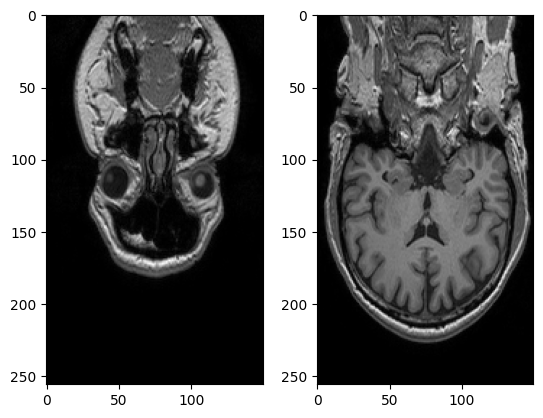

In [ ]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[40,:,:], cmap = "gray")
axis[1].imshow(brain_mri_data[120,:,:], cmap = "gray")

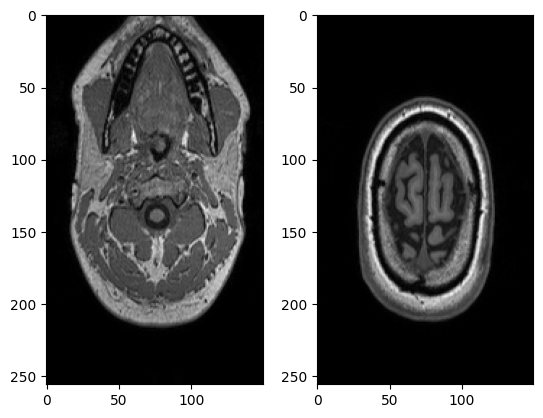

In [ ]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:,30,:], cmap = "gray")
axis[1].imshow(brain_mri_data[:,200,:], cmap = "gray")

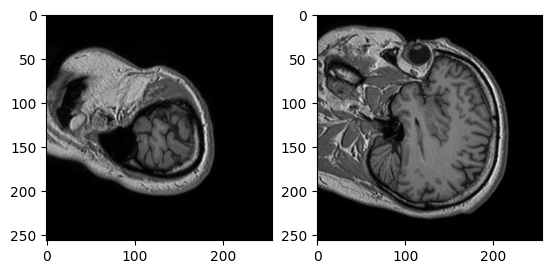

In [ ]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:,:,20], cmap = "gray")
axis[1].imshow(brain_mri_data[:,:,45], cmap = "gray")

In [ ]:
voxel_coords = np.array((0,0,0,1))
physical_coords = affine @ voxel_coords
physical_coords
print(physical_coords)

[ -90.67985535  102.82944489 -114.82378387    1.        ]


In [ ]:
affine[:,3:]

array([[ -90.67985535],
       [ 102.82944489],
       [-114.82378387],
       [   1.        ]])

In [ ]:
voxel_coords_manual = np.array((0,0,0))
physical_coords_manual = affine[:3,:3] @ voxel_coords_manual
physical_coords_manual += affine[:3,3]
physical_coords_manual
print(physical_coords_manual)

[ -90.67985535  102.82944489 -114.82378387]


In [ ]:
physical_coords = [-90.67985535, 102.82944489, -114.82378387,    1.        ]
(np.linalg.inv(affine) @ np.array(physical_coords)).round()

array([-0.,  0., -0.,  1.])

#Resampling

In [ ]:
print(brain_mri.shape)

(256, 256, 150)


In [ ]:
print(brain_mri.header.get_zooms())

(np.float32(0.9375), np.float32(0.9375), np.float32(1.2000039))


In [ ]:
import nibabel.processing

In [ ]:
voxel_size = (2,2,2)
brain_mri_resized = nibabel.processing.conform(brain_mri, (128,128,100), voxel_size, orientation="PSR")
brain_mri_resized_data = brain_mri_resized.get_fdata()

In [ ]:
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(128, 128, 100)
(np.float32(2.0), np.float32(2.0), np.float32(2.0))


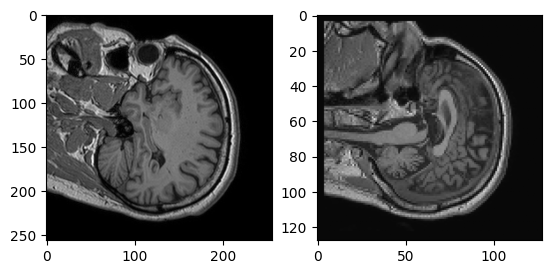

In [ ]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:,:,50], cmap = "gray")
axis[1].imshow(brain_mri_resized_data[:,:,50], cmap = "gray")

#Normalisation adn Standardization

In [ ]:
!ls "/content/drive/My Drive/archive/03-Preprocessing"

03-Preprocessing.ipynb	    la_003.nii.gz
IXI662-Guys-1120-T1.nii.gz  lung_043.nii.gz


In [ ]:
lung_ct = nib.load("/content/drive/My Drive/archive/03-Preprocessing/lung_043.nii.gz")
lung_ct_data = lung_ct.get_fdata()

In [ ]:
lung_ct_data_standardised = lung_ct_data - lung_ct_data / 3071

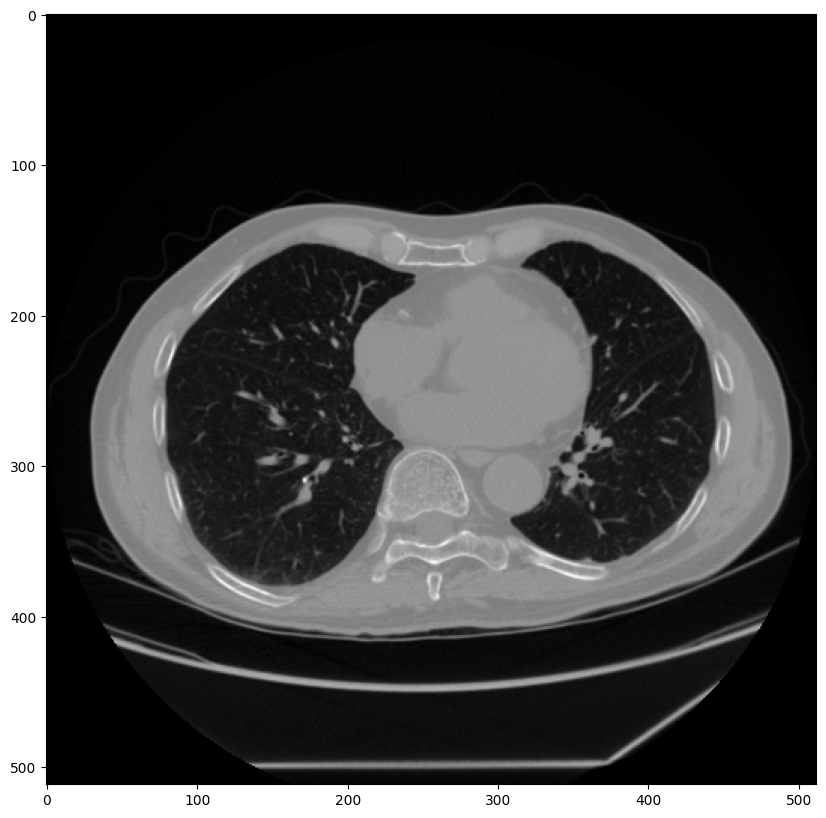

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(lung_ct_data_standardised[:,:,50]), cmap = "gray")

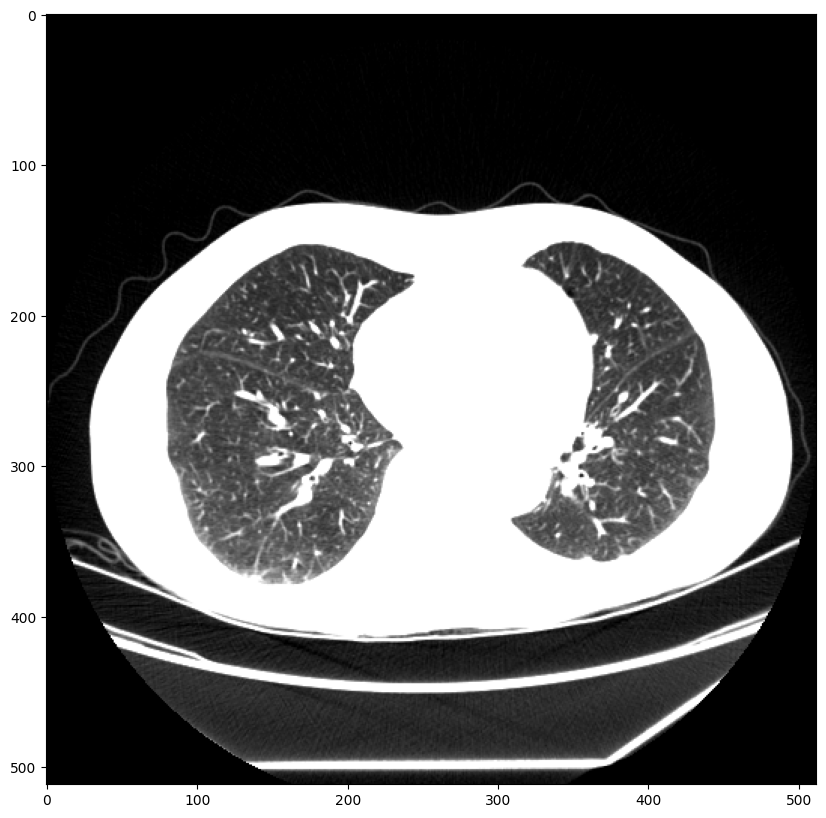

In [ ]:
lung_ct_lung_window = np.clip(lung_ct_data, -1000, -500)
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(lung_ct_lung_window[:,:,50]), cmap = "gray")

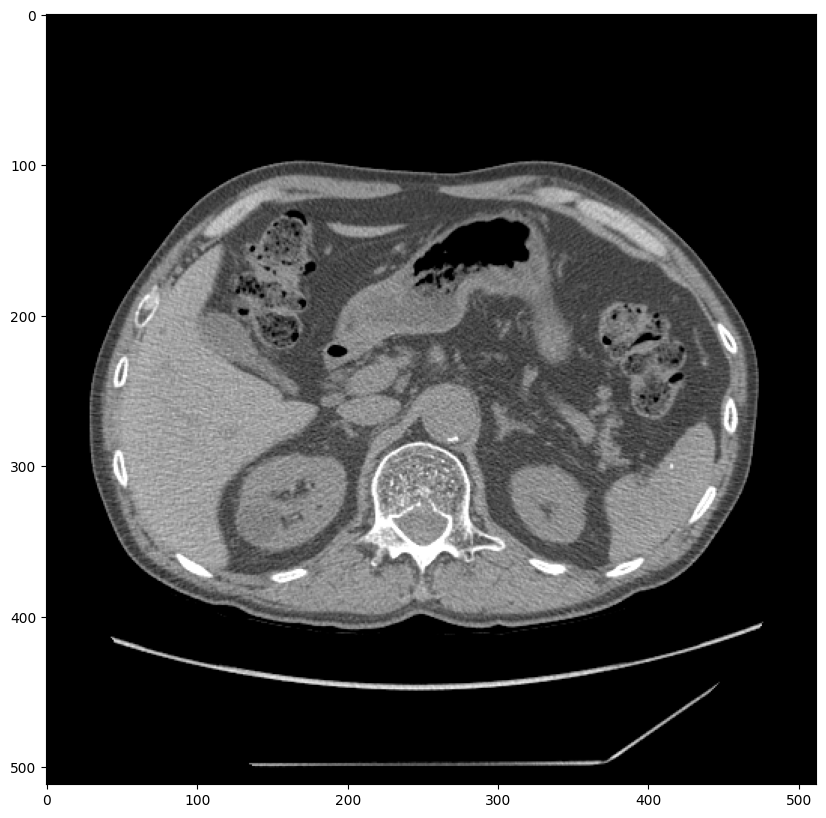

In [ ]:
lung_ct_tissue_window = np.clip(lung_ct_data, -250, 250)
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(lung_ct_tissue_window[:,:,5]), cmap = "gray")

In [ ]:
cardiac_mri = nib.load("/content/drive/My Drive/archive/03-Preprocessing/la_003.nii.gz")
cardiac_mri_data = cardiac_mri.get_fdata()

In [ ]:
mean, std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)
cardiac_mri_norm = (cardiac_mri_data - mean) / std
cardiac_mri_standardised = (cardiac_mri_norm - np.min(cardiac_mri_norm)) / (np.max(cardiac_mri_norm) - np.min(cardiac_mri_norm))

In [ ]:
np.mean(cardiac_mri_standardised), np.std(cardiac_mri_standardised), np.min(cardiac_mri_standardised), np.max(cardiac_mri_standardised)

(np.float64(0.08641350659554545),
 np.float64(0.1317333885617455),
 np.float64(0.0),
 np.float64(1.0))

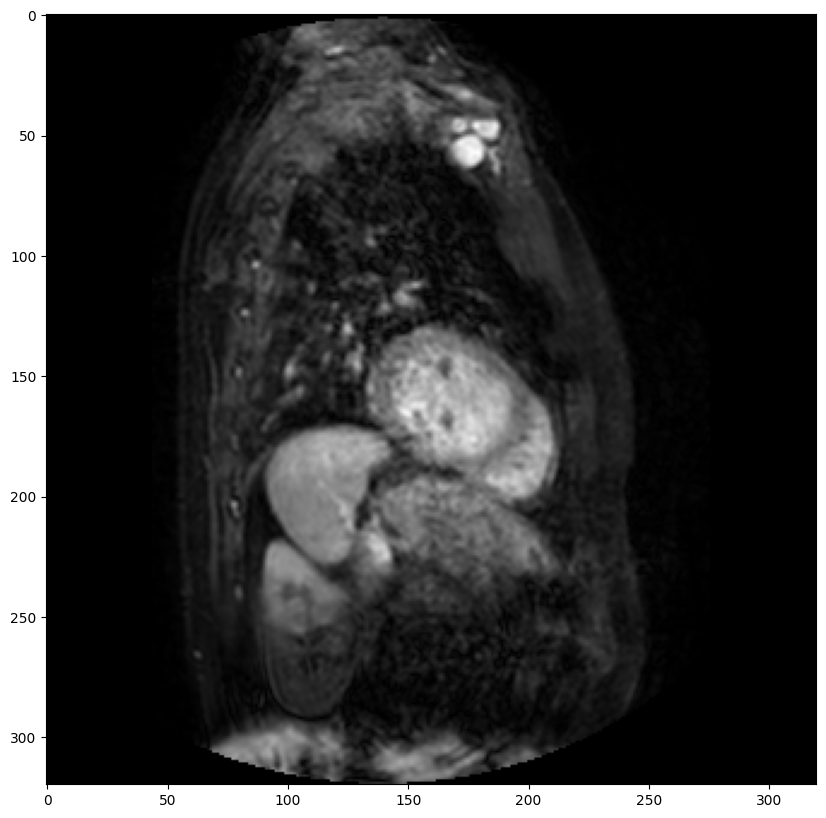

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(cardiac_mri_standardised[:,:,30]), cmap = "gray")